In [15]:
from keras import layers
from keras import models
from keras.datasets import mnist
from keras.utils import to_categorical
import tensorflow as tf

In [16]:
mnist=tf.keras.datasets.mnist

In [17]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [18]:
print(test_images.shape)
train_images.shape

(10000, 28, 28)


(60000, 28, 28)

<function matplotlib.pyplot.show(close=None, block=None)>

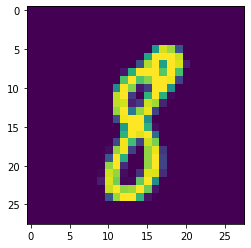

In [19]:
#Check How Data loook Like
import matplotlib.pyplot as plt

plt.imshow(train_images[300])
plt.show #Show Graph


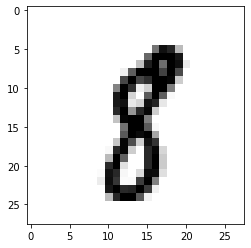

In [20]:
plt.imshow(train_images[300],cmap=plt.cm.binary)

# Creating a Deep Neural Network

In [21]:
### Create Neural Network
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) ## 1st convolution layer to mention input layer size
model1.add(layers.MaxPooling2D((2, 2)))  #Maxpooling ie single max value of 2x2 matrix will get and remaining will drop 
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))  ##2nd convolution layer
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu')) ##3rd convolution layer

model1.add(layers.Flatten())  ##before using fully connected layer,need to be flatten so that 2D to 1D
model1.add(layers.Dense(64, activation='relu')) ##Fully Connected Layer
#last Fully connected layer,output must be equal to number of classes,10(0-9)
model1.add(layers.Dense(10, activation='softmax')) #last dense layer must be equal to 10
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [22]:
train_images = train_images.reshape((60000, 28, 28, 1)) ##increasing one dimension for kernel operation
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)) 
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history=model1.fit(train_images, train_labels, epochs=5, batch_size=64)


Epoch 1/5
938/938 [==============================] - 22s 23ms/step - loss: 0.1637 - accuracy: 0.9478
Epoch 2/5
938/938 [==============================] - 22s 23ms/step - loss: 0.0488 - accuracy: 0.9846
Epoch 3/5
938/938 [==============================] - 22s 23ms/step - loss: 0.0324 - accuracy: 0.9903
Epoch 4/5
938/938 [==============================] - 22s 23ms/step - loss: 0.0236 - accuracy: 0.9927
Epoch 5/5
938/938 [==============================] - 23s 24ms/step - loss: 0.0197 - accuracy: 0.9942


In [23]:
test_loss,test_acc=model1.evaluate(test_images,test_labels)
print("Test loss on 10,000 test sample",test_loss)
print("Test laccuracy on 10,000 test sample",test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0337 - accuracy: 0.9908
Test loss on 10,000 test sample 0.03372851759195328
Test laccuracy on 10,000 test sample 0.9908000230789185


In [13]:
model1.save('C:\\Users\\lokha\\OneDrive\\Desktop\\coursera\\mnist_modeldigit.h5')

# GUI

In [ ]:
from tkinter import *

import cv2
import numpy as np
from PIL import ImageGrab
from keras.models import load_model
import webbrowser

model = load_model('C:\\Users\\lokha\\OneDrive\\Desktop\\coursera\\mnist_model2.h5')
image_folder = "C:\\Users\\lokha\\OneDrive\\Desktop\\coursera\\img\\"

root = Tk()
root.resizable(0, 0)
root.title("Digit Recognition System")

lastx, lasty = None, None
image_number = 0

cv = Canvas(root, width=800, height=600, bg='white')
cv.grid(row=0, column=0, pady=2, sticky=NSEW, columnspan=2)


def clear_widget():
    global cv
    cv.delete('all')


def draw_lines(event):
    global lastx, lasty
    x, y = event.x, event.y
    cv.create_line((lastx, lasty, x, y), width=8, fill='black', capstyle=ROUND, smooth=TRUE, splinesteps=12)
    lastx, lasty = x, y


def activate_event(event):
    global lastx, lasty
    cv.bind('<B1-Motion>', draw_lines)
    lastx, lasty = event.x, event.y


cv.bind('<Button-1>', activate_event)


def Recognize_Digit():
    global image_number
    filename = f'img_{image_number}.png'
    widget = cv

    x = root.winfo_rootx() + widget.winfo_rootx()
    y = root.winfo_rooty() + widget.winfo_rooty()
    x1 = x + widget.winfo_width()
    y1 = y + widget.winfo_height()
    print(x, y, x1, y1)

    # get image and save
    ImageGrab.grab().crop((x, y, x1, y1)).save(image_folder + filename)

    image = cv2.imread(image_folder + filename, cv2.IMREAD_COLOR)
    gray = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
    ret, th = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    contours = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]

    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        # make a rectangle box around each curve
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 1)

        # Cropping out the digit from the image corresponding to the current contours in the for loop
        digit = th[y:y + h, x:x + w]

        # Resizing that digit to (18, 18)
        resized_digit = cv2.resize(digit, (18, 18))

        # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
        padded_digit = np.pad(resized_digit, ((5, 5), (5, 5)), "constant", constant_values=0)

        digit = padded_digit.reshape(1, 28, 28, 1)
        digit = digit / 255.0

        pred = model.predict([digit])[0]
        final_pred = np.argmax(pred)

        data = str(final_pred) + ' ' + str(int(max(pred) * 100)) + '%'

        font = cv2.FONT_HERSHEY_SIMPLEX
        fontScale = 0.5
        color = (255, 0, 0)
        thickness = 1
        cv2.putText(image, data, (x, y - 5), font, fontScale, color, thickness)

    cv2.imshow('Predictions', image)
    cv2.waitKey(0)
    
def callback():
        webbrowser.open_new(r"www.google.com")    
btn_save = Button(text='Recognize Digits',width=15, height=3, command=Recognize_Digit)
btn_save.grid(row=2, column=0, pady=1, padx=1)
button_clear = Button(text='Clear Output',width=15, height=3, command=clear_widget)
button_clear.grid(row=2, column=1, pady=1, padx=1)
button_info = Button(text='Feedback', width=15, height=2, command=callback)
button_info.grid(row=3, column=0, pady=1, padx=1)

root.mainloop()
